# 라이브러리 환경

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  
print("시드 고정: ", SEED)

시드 고정:  12


# 데이터 전처리

In [3]:
# skleran 데이터셋에서 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target
print(X_data.shape, y_data.shape)

(506, 13) (506,)


In [4]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [8]:
# 학습 - 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


# 신경망 학습

In [9]:
# 심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

model = build_model(num_input=13)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델 훈련
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
13/13 - 0s - loss: 562.7947 - mae: 21.8309 - 332ms/epoch - 26ms/step
Epoch 2/100
13/13 - 0s - loss: 488.1955 - mae: 19.9646 - 10ms/epoch - 769us/step
Epoch 3/100
13/13 - 0s - loss: 338.0201 - mae: 15.5721 - 18ms/epoch - 1ms/step
Epoch 4/100
13/13 - 0s - loss: 152.8982 - mae: 9.5517 - 16ms/epoch - 1ms/step
Epoch 5/100
13/13 - 0s - loss: 126.4297 - mae: 8.8710 - 14ms/epoch - 1ms/step
Epoch 6/100
13/13 - 0s - loss: 97.8464 - mae: 7.3805 - 16ms/epoch - 1ms/step
Epoch 7/100
13/13 - 0s - loss: 80.5298 - mae: 6.6845 - 19ms/epoch - 1ms/step
Epoch 8/100
13/13 - 0s - loss: 67.3773 - mae: 6.0351 - 27ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 59.2237 - mae: 5.5133 - 12ms/epoch - 923us/step
Epoch 10/100
13/13 - 0s - loss: 54.0707 - mae: 5.2915 - 15ms/epoch - 1ms/step
Epoch 11/100
13/13 - 0s - loss: 50.3197 - mae: 4.9420 - 19ms/epoch - 1ms/step
Epoch 12/100
13/13 - 0s - loss: 47.6906 - mae: 4.9179 - 15ms/epoch - 1ms/step
Epoch 13/100
13/13 - 0s - loss: 44.1344 - mae: 4.6512 - 21m

In [11]:
# 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 11.9346 - mae: 2.5706


[11.9346284866333, 2.570627450942993]

# 교차 검증

In [12]:
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200,
                    validation_split=0.25, verbose=2)

Epoch 1/200
10/10 - 0s - loss: 566.7573 - mae: 21.9385 - val_loss: 515.1504 - val_mae: 20.7047 - 387ms/epoch - 39ms/step
Epoch 2/200
10/10 - 0s - loss: 503.1967 - mae: 20.4027 - val_loss: 426.7216 - val_mae: 18.3588 - 29ms/epoch - 3ms/step
Epoch 3/200
10/10 - 0s - loss: 380.5530 - mae: 16.9985 - val_loss: 269.0835 - val_mae: 13.3364 - 34ms/epoch - 3ms/step
Epoch 4/200
10/10 - 0s - loss: 203.0931 - mae: 11.1510 - val_loss: 125.0759 - val_mae: 8.5931 - 33ms/epoch - 3ms/step
Epoch 5/200
10/10 - 0s - loss: 129.1895 - mae: 8.9223 - val_loss: 121.8186 - val_mae: 8.9673 - 33ms/epoch - 3ms/step
Epoch 6/200
10/10 - 0s - loss: 105.4088 - mae: 7.8732 - val_loss: 87.9445 - val_mae: 7.0101 - 29ms/epoch - 3ms/step
Epoch 7/200
10/10 - 0s - loss: 89.8491 - mae: 6.8246 - val_loss: 74.3090 - val_mae: 6.2348 - 32ms/epoch - 3ms/step
Epoch 8/200
10/10 - 0s - loss: 76.7941 - mae: 6.4276 - val_loss: 63.4918 - val_mae: 6.2655 - 33ms/epoch - 3ms/step
Epoch 9/200
10/10 - 0s - loss: 67.2318 - mae: 5.9897 - val_l

Epoch 72/200
10/10 - 0s - loss: 9.4614 - mae: 2.1342 - val_loss: 11.9116 - val_mae: 2.4556 - 41ms/epoch - 4ms/step
Epoch 73/200
10/10 - 0s - loss: 9.2825 - mae: 2.1168 - val_loss: 11.8939 - val_mae: 2.4893 - 25ms/epoch - 3ms/step
Epoch 74/200
10/10 - 0s - loss: 9.3130 - mae: 2.1279 - val_loss: 11.9660 - val_mae: 2.4299 - 38ms/epoch - 4ms/step
Epoch 75/200
10/10 - 0s - loss: 9.1350 - mae: 2.1148 - val_loss: 11.6981 - val_mae: 2.4304 - 33ms/epoch - 3ms/step
Epoch 76/200
10/10 - 0s - loss: 9.2092 - mae: 2.1230 - val_loss: 11.7112 - val_mae: 2.4238 - 34ms/epoch - 3ms/step
Epoch 77/200
10/10 - 0s - loss: 9.0486 - mae: 2.1452 - val_loss: 12.0322 - val_mae: 2.4122 - 29ms/epoch - 3ms/step
Epoch 78/200
10/10 - 0s - loss: 8.6344 - mae: 2.0580 - val_loss: 11.5702 - val_mae: 2.4513 - 27ms/epoch - 3ms/step
Epoch 79/200
10/10 - 0s - loss: 8.6362 - mae: 2.0781 - val_loss: 11.7210 - val_mae: 2.4883 - 29ms/epoch - 3ms/step
Epoch 80/200
10/10 - 0s - loss: 8.8407 - mae: 2.0821 - val_loss: 11.6123 - val_m

Epoch 143/200
10/10 - 0s - loss: 4.4275 - mae: 1.5703 - val_loss: 9.7966 - val_mae: 2.1828 - 29ms/epoch - 3ms/step
Epoch 144/200
10/10 - 0s - loss: 4.1251 - mae: 1.5404 - val_loss: 10.0409 - val_mae: 2.2040 - 34ms/epoch - 3ms/step
Epoch 145/200
10/10 - 0s - loss: 4.1751 - mae: 1.5393 - val_loss: 10.3182 - val_mae: 2.1720 - 28ms/epoch - 3ms/step
Epoch 146/200
10/10 - 0s - loss: 4.3161 - mae: 1.5655 - val_loss: 9.8578 - val_mae: 2.1578 - 32ms/epoch - 3ms/step
Epoch 147/200
10/10 - 0s - loss: 4.0428 - mae: 1.5454 - val_loss: 10.4139 - val_mae: 2.2668 - 30ms/epoch - 3ms/step
Epoch 148/200
10/10 - 0s - loss: 4.0657 - mae: 1.5311 - val_loss: 9.8533 - val_mae: 2.1794 - 41ms/epoch - 4ms/step
Epoch 149/200
10/10 - 0s - loss: 3.8388 - mae: 1.4765 - val_loss: 10.4488 - val_mae: 2.2988 - 29ms/epoch - 3ms/step
Epoch 150/200
10/10 - 0s - loss: 4.2145 - mae: 1.5990 - val_loss: 10.1459 - val_mae: 2.2309 - 27ms/epoch - 3ms/step
Epoch 151/200
10/10 - 0s - loss: 4.0458 - mae: 1.5316 - val_loss: 10.0555 -

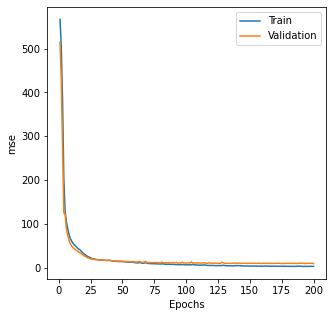

In [13]:
import matplotlib.pyplot as plt
def plot_loss_curve(total_epoch=10, start=1):
    plt.figure(figsize=(5, 5))
    plt.plot(range(start, total_epoch + 1), 
             history.history['loss'][start-1:total_epoch], 
             label='Train')
    plt.plot(range(start, total_epoch + 1), 
             history.history['val_loss'][start-1:total_epoch], 
             label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

plot_loss_curve(total_epoch=200, start=1)

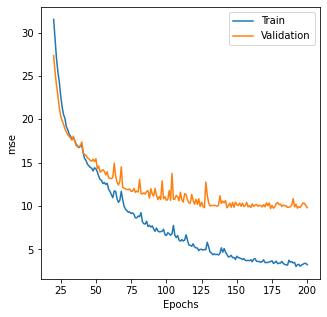

In [14]:
plot_loss_curve(total_epoch=200, start=20)